In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('news_dataset.csv')

df.head(5)

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


In [3]:
print('Shape : ', df.shape)

Shape :  (3729, 2)


In [4]:
df['label'].value_counts()

label
FAKE    1877
REAL    1852
Name: count, dtype: int64

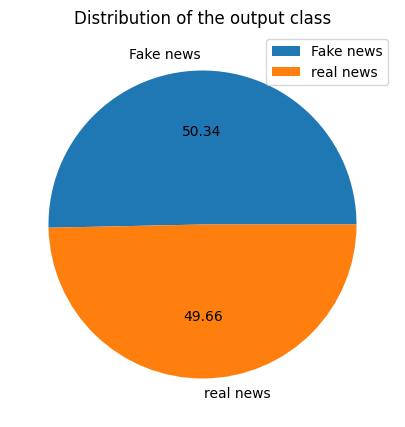

In [5]:
# plot the class distribution

plt.figure(figsize= (7 ,5))
plt.pie(df['label'].value_counts() , labels = ['Fake news' , 'real news'] , autopct = '%0.2f')
plt.title('Distribution of the output class')
plt.legend()
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
# Encode the output column

encoder = LabelEncoder()

df['label'] = encoder.fit_transform(df['label'])

df.head(5)

,label,text
0,1,Payal has accused filmmaker Anurag Kashyap of ...
1,0,A four-minute-long video of a woman criticisin...
2,0,"Republic Poll, a fake Twitter account imitatin..."
3,1,"Delhi teen finds place on UN green list, turns..."
4,1,Delhi: A high-level meeting underway at reside...


In [8]:
type(df['text'])

pandas.core.series.Series

In [9]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
import re

stop_words = set(stopwords.words('english'))

In [10]:
def preprocess_text(text):

    
    # Handle non-string values (NaN, floats, None, etc.)
    if not isinstance(text, str):
        return ""

    # remove unwanted characters (fixed regex too: [] instead of ^…)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # convert to lowercase
    text = text.lower()

    # tokenize
    token = word_tokenize(text)

    # remove stopwords
    token = [word for word in token if word not in stop_words]

    return ' '.join(token)

In [11]:
df['Cleaned_text'] = df['text'].apply(preprocess_text)

In [12]:
df.head(5)

,label,text,Cleaned_text
0,1,Payal has accused filmmaker Anurag Kashyap of ...,payal accused filmmaker anurag kashyap behavin...
1,0,A four-minute-long video of a woman criticisin...,fourminutelong video woman criticising governm...
2,0,"Republic Poll, a fake Twitter account imitatin...",republic poll fake twitter account imitating a...
3,1,"Delhi teen finds place on UN green list, turns...",delhi teen finds place un green list turns gla...
4,1,Delhi: A high-level meeting underway at reside...,delhi highlevel meeting underway residence raj...


In [13]:
df['length'] = df['Cleaned_text'].apply(len)

In [14]:
df.head(5)

,label,text,Cleaned_text,length
0,1,Payal has accused filmmaker Anurag Kashyap of ...,payal accused filmmaker anurag kashyap behavin...,358
1,0,A four-minute-long video of a woman criticisin...,fourminutelong video woman criticising governm...,2116
2,0,"Republic Poll, a fake Twitter account imitatin...",republic poll fake twitter account imitating a...,2109
3,1,"Delhi teen finds place on UN green list, turns...",delhi teen finds place un green list turns gla...,1762
4,1,Delhi: A high-level meeting underway at reside...,delhi highlevel meeting underway residence raj...,3941


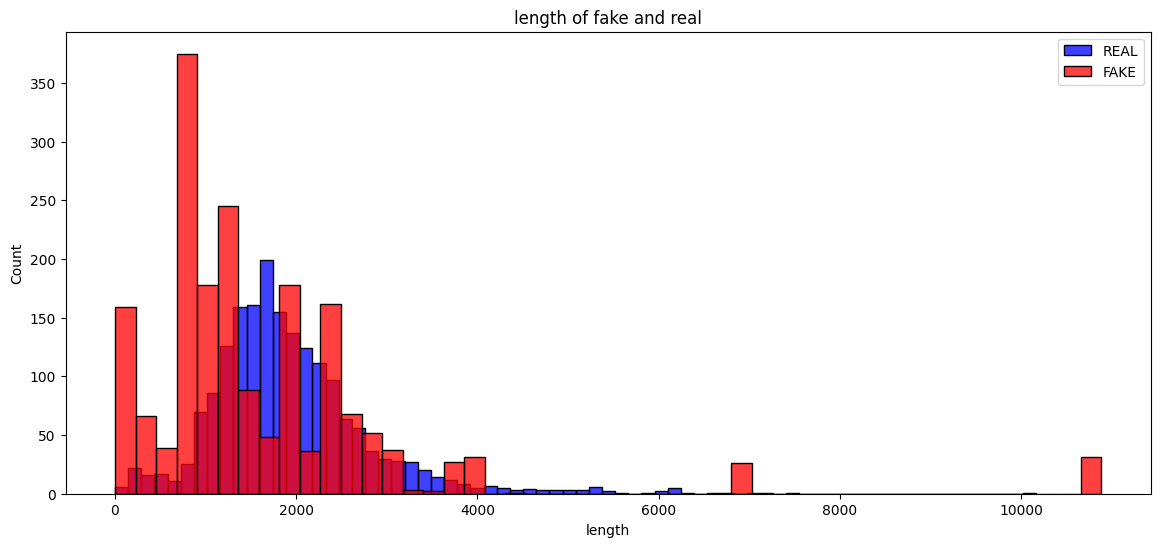

In [15]:
plt.figure(figsize = (14 ,6))
sns.histplot(df[df['label'] == 0]['length'] , color = 'blue' , label = 'REAL')
sns.histplot(df[df['label'] == 1]['length'] , color = 'red' , label = 'FAKE')
plt.title('length of fake and real')
plt.legend()
plt.show()


In [16]:
from wordcloud import WordCloud

wc = WordCloud(width = 500 , height= 500 , min_font_size= 10 , background_color= 'white')



In [17]:
real_wc = wc.generate(df[df['label'] == 1]['Cleaned_text'].str.cat(sep = ' '))

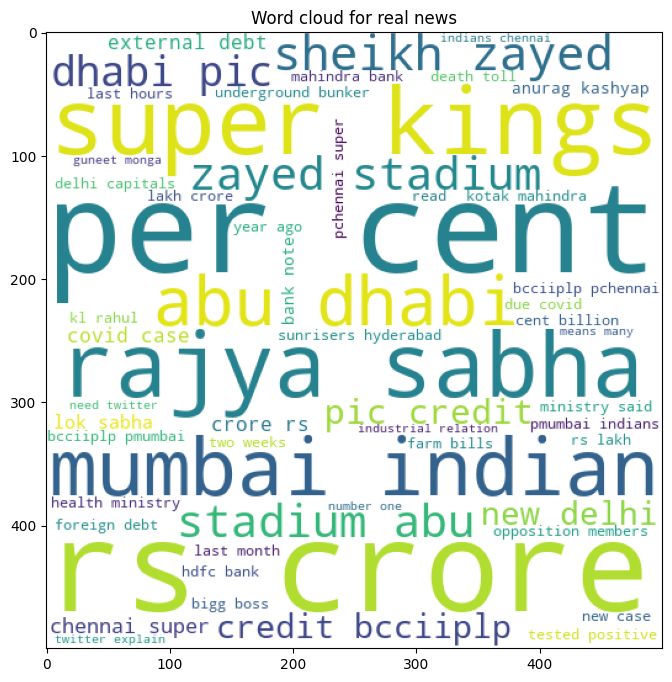

In [18]:
plt.figure(figsize= (10 ,8))
plt.imshow(real_wc)
plt.title('Word cloud for real news')
plt.show()

FAKE NEWS FOR

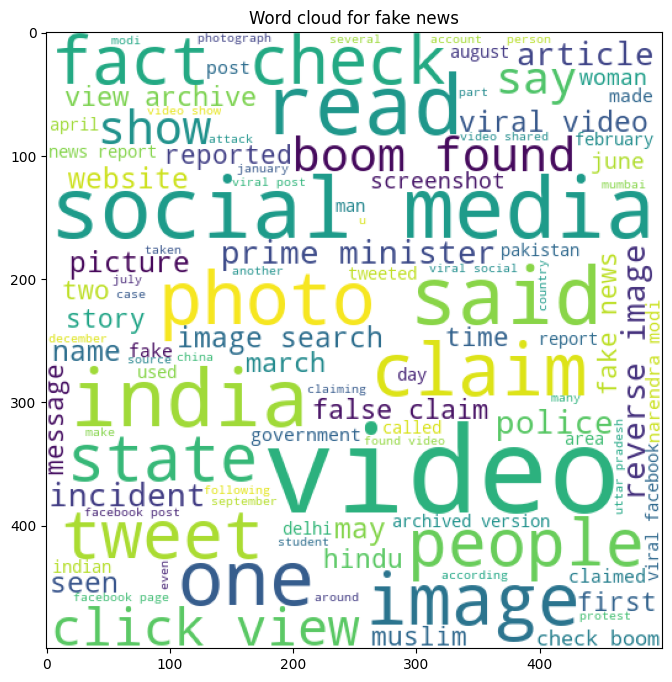

In [19]:
fake_wc = wc.generate(df[df['label'] == 0]['Cleaned_text'].str.cat(sep = ' '))

plt.figure(figsize= (10 , 8))
plt.imshow(fake_wc)
plt.title('Word cloud for fake news')
plt.show()

### FAKE NEWS OCCURED WORDS

In [20]:
# find out most frequent word in spam

fake_corpus = []

for msg in df[df['label'] == 1]['Cleaned_text'].tolist():

    for word in msg.split():

        fake_corpus.append(word)

In [21]:
len(fake_corpus)

411348

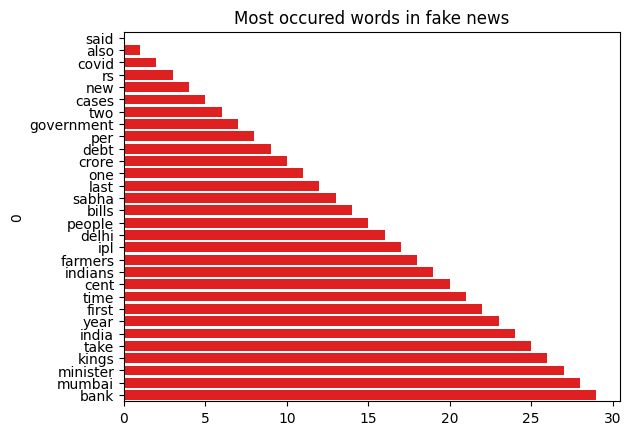

In [22]:
from collections import Counter

sns.barplot(pd.DataFrame(Counter(fake_corpus).most_common(30))[0] , color = 'red')
plt.xticks()
plt.title('Most occured words in fake news')
plt.show()

### REAL NEWS OCCURED WORDS

In [23]:
# find out most frequent word in real

real_corpus = []

for msg in df[df['label'] == 1]['Cleaned_text'].tolist():

    for word in msg.split():

        real_corpus.append(word)

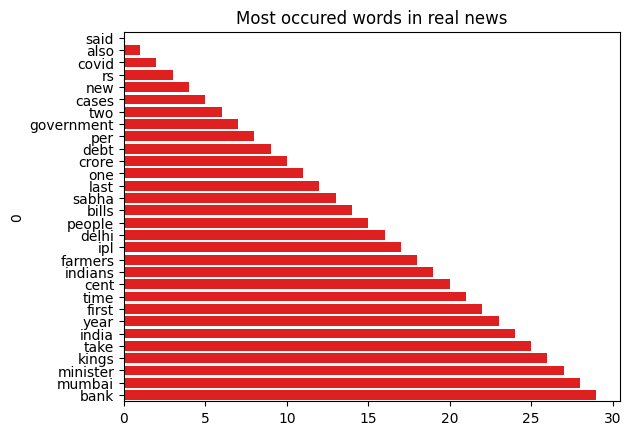

In [24]:
sns.barplot(pd.DataFrame(Counter(real_corpus).most_common(30))[0] , color = 'red')
plt.xticks()
plt.title('Most occured words in real news')
plt.show()

In [53]:
# vectorizer the dataset

tfidf = TfidfVectorizer(stop_words = 'english' , max_features = 4000)

In [54]:
# fit the  data

x = tfidf.fit_transform(df['Cleaned_text'])

y = df['label']

print(x.shape , y.shape)

(3729, 4000) (3729,)


In [62]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.2 , random_state= 42)

print(x_train.shape  , y_train.shape)
print(x_test.shape  , y_test.shape)

(2983, 4000) (2983,)
(746, 4000) (746,)


In [63]:
# make the model

pac = PassiveAggressiveClassifier(max_iter = 50)

# fit the model
pac.fit(x_train , y_train)

# calculate the prediction
y_pred = pac.predict(x_test)


# calculate the prediction
print('accuracy_score : ' , accuracy_score(y_test , y_pred))

accuracy_score :  0.9946380697050938


In [64]:
# plot the confusion matrix

print('Confusion matrix : \n\n' , confusion_matrix(y_test , y_pred))

Confusion matrix : 

 [[370   3]
 [  1 372]]


In [65]:
# print the precision and recall

print('precision_score : ' , precision_score(y_test , y_pred))
print('recall_score : ' , recall_score(y_test , y_pred))

precision_score :  0.992
recall_score :  0.9973190348525469


In [67]:
import joblib

joblib.dump(tfidf , 'tfidf.pkl')
joblib.dump(pac , 'model.pkl')


['model.pkl']

In [78]:
df.iloc[3].text

'Delhi teen finds place on UN green list, turns glass into sand\n\nNEW DELHI: Udit Singhal , who founded a startup to turn glass bottles into sand , has been named among 17 people in the United Nation’s 2020 Class of Young Leaders for Sustainable Development Goals (SDGs). The programme is a flagship initiative that recognises the efforts of young people in driving action and galvanising others in support of UN’s 2030 agenda for sustainable development.Singhal, an 18-year-old who lives near Mandi House, told TOI, “I feel proud to represent India. Along with 16 others, I’ll work to motivate youths and achieve SDGs. I hope to be able to encourage communities to inculcate better civic sense to create sustainable living spaces.” The teenager attended the UN function online due to the Covid pandemic. “In the normal scenario, I would have gone to New York,” he added.Singhal had founded Glass2Sand in 2019 as a zero-waste system that turns bottles into economically viable sand. “In 2018, I foun